In [10]:
import numpy as np
import matplotlib.pyplot as plt
# !pip3 install ipympl
%matplotlib widget

In [11]:
from google.colab import output
output.enable_custom_widget_manager()

# **Object-Oriented Programming**
An object is the key component in this mode. It contains data in the form of attributes/characteristics and code in the form of methods/functions that apply on it.

## **Particle as an Object**
In order to create an object, we create a class - which acts as the blueprint for creating several new objects. The class defines the attributes and the behaviour of the methods that our instances of the class (our objects) will inherit.

New categories of objects may be created by _extending_ the attributes and methods of some standard class. This allows us to add on deeper functionality while still preserving the fundamental structure of our objects.

For Example: The **Particle** class may be extended by **Electron** class.

## **Attributes and Methods of the Particle class**



1.   **Attributes**
> *   Mass
> *   Position in 3D space $(x, y, z)$
> *   Velocity in 3D space $(v_x, v_y, v_z)$


2.   **Methods**
> *   move($t$)
> *   distance_from_orgin($x, y, z$)



In [55]:
class Particle:
  def __init__(self, m, x, y, z, vx, vy, vz):
    self.m = m
    self.x = x
    self.y = y
    self.z = z
    self.vx = vx
    self.vy = vy
    self.vz = vz

  def move(self, t):
    self.x += self.vx * t
    self.y += self.vy * t
    self.z += self.vz * t

  def origin(self):
    return np.sqrt(self.x**2 + self.y**2 + self.z**2)

  def plot(self):
    fig = plt.figure(figsize = (5, 3))
    ax = fig.add_subplot(projection="3d", computed_zorder = False)
    ax.scatter(self.x, self.y, self.z, c = "red", s = 50, zorder = 1)
    plt.show()

  def compare_plot(self, point):
    fig = plt.figure(figsize = (5, 3))
    ax = fig.add_subplot(projection="3d", computed_zorder = False)
    ax.scatter(self.x, self.y, self.z, c = "red", s = 50, zorder = 1)
    ax.scatter(point[0], point[1], point[2], c = "blue", s = 50, zorder = 1)
    plt.show()

In [56]:
p1 = Particle(5, 1, 1, 0, -1, 0, 1)

In [57]:
p1.origin()

1.4142135623730951

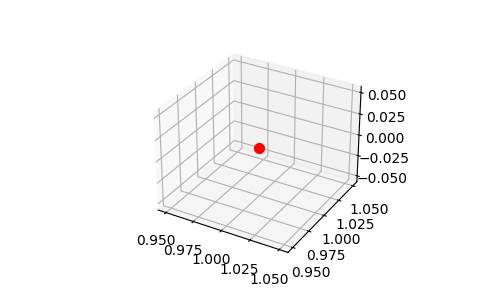

In [58]:
p1.plot()

In [59]:
p1.move(10)

In [60]:
print(p1.x, p1.y, p1.z)

-9 1 10


In [61]:
p1.origin()

13.490737563232042

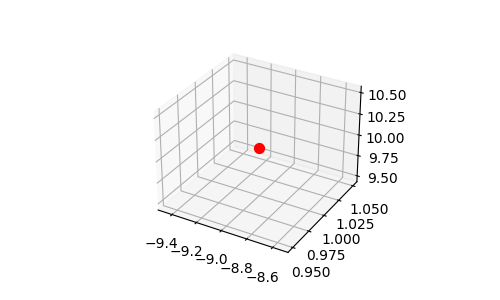

In [62]:
p1.plot()

## **Inheritence of Class**
**Electron** inherits all the characteristics of the **Particle** class and in addition, adds on more functionality to it.
1. Additional Attributes
> * mass $m = 9.11 \times 10^{-31} kg$
> * charge $q = -1.602 \times 10^{-27} C$

2. Changes to the move() method
> * May move in an Electric field $\mathbf{E} = (E_x, E_y, E_z)$ with an acceleration $\mathbf{a} = \left(\frac{q\mathbf{E}}{m}\right)$
> * Motion now described as:
> * $\bar{x} = x + v_xt + \frac{1}{2}a_xt^2$
> * $\bar{y} = y + v_yt + \frac{1}{2}a_yt^2$
> * $\bar{z} = z + v_zt + \frac{1}{2}a_zt^2$
> * $\bar{v_x} = v_x + a_xt$
> * $\bar{v_y} = v_y + a_yt$
> * $\bar{v_z} = v_z + a_zt$



In [63]:
class Electron(Particle):
  def __init__(self, x, y, z, vx, vy, vz):
    self.m = 9.11e-31
    self.q = -1.602e-19
    super(Electron, self).__init__(self.m, x, y, z, vx, vy, vz)

  def move(self, t, Ex, Ey, Ez):
    self.x += self.vx * t + (1/2) * ((self.q * Ex)/self.m) * t**2
    self.y += self.vy * t + (1/2) * ((self.q * Ey)/self.m) * t**2
    self.z += self.vz * t + (1/2) * ((self.q * Ez)/self.m) * t**2
    self.vx += ((self.q * Ex)/self.m) * t
    self.vy += ((self.q * Ey)/self.m) * t
    self.vz += ((self.q * Ez)/self.m) * t

  def position(self):
    return np.array([self.x, self.y, self.z])

  def velocity(self):
    return np.array([self.vx, self.vy, self.vz])

In [73]:
e1 = Electron(0, 1, 2, 1, 0, 0)

In [74]:
e1.origin()

2.23606797749979

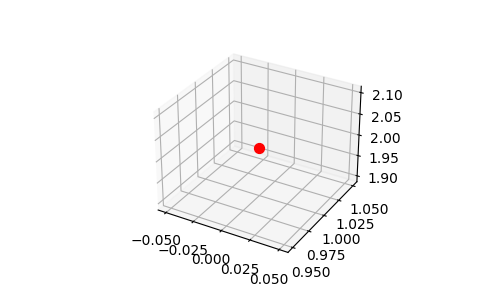

In [75]:
e1.plot()

In [76]:
e1.velocity()

array([1, 0, 0])

In [77]:
e1.position()

array([0, 1, 2])

In [78]:
e1.move(2, 10e-10, 0, 1.2e-6)

In [79]:
e1.position()

array([-3.49701427e+02,  1.00000000e+00, -4.22039712e+05])

In [80]:
e1.velocity()

array([-3.50701427e+02,  0.00000000e+00, -4.22041712e+05])

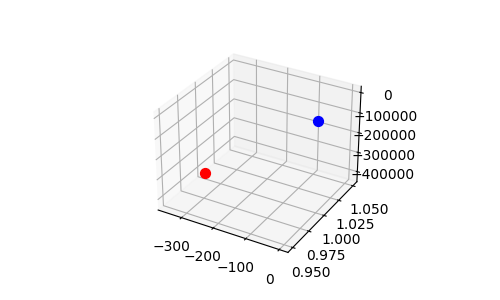

In [81]:
e1.compare_plot([0, 1, 2])